In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

In [ ]:
feature = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_label.csv')
X = feature.values
y = label.values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}")

X_train: (83, 5), y_train: (83, 1), X_val: (41, 5), y_val: (41, 1)


In [ ]:
ydf=y.reshape(-1,1)
data = np.hstack([ydf,X])
df = pd.DataFrame({'weight': data[:, 0], 'length 1': data[:, 1], 'length 2': data[:, 2],'length 3': data[:, 3],'height': data[:, 4], 'width': data[:, 5]})
df.corr()

,weight,length 1,length 2,length 3,height,width
weight,1.000000,0.896701,0.901190,0.907433,0.752397,0.905430
length 1,0.896701,1.000000,0.999453,0.991086,0.624927,0.863386
length 2,0.901190,0.999453,1.000000,0.993447,0.641460,0.870278
length 3,0.907433,0.991086,0.993447,1.000000,0.707648,0.874232
height,0.752397,0.624927,0.641460,0.707648,1.000000,0.784274
width,0.905430,0.863386,0.870278,0.874232,0.784274,1.000000


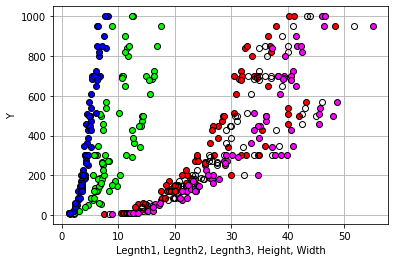

In [ ]:
plt.plot(X_train[:, 0],y_train,'ob',markeredgecolor='black', markerfacecolor=(1,0,0,1)) #Red | Length1
plt.plot(X_train[:, 1],y_train,'ob',markeredgecolor='black', markerfacecolor=(1,1,0,0)) #White | Length2
plt.plot(X_train[:, 2],y_train,'ob',markeredgecolor='black', markerfacecolor=(1,0,1,1)) #Pink | Length3
plt.plot(X_train[:, 3],y_train,'ob',markeredgecolor='black', markerfacecolor=(0,1,0,1)) #Green | height
plt.plot(X_train[:, 4],y_train,'ob',markeredgecolor='black', markerfacecolor=(0,0,1,1)) #Blue | Width

plt.xlabel('Legnth1, Legnth2, Legnth3, Height, Width')
plt.ylabel('Y')


plt.grid()

In [ ]:
print(X_train[0:5, :])
#the range of the values differs a lot (first three columns have a larger range + higher, but last two are much smaller) so we should normalise to make sure that the actual size of the variables
#doesn't influence the model wrongly

[[18.6    20.     22.2     6.216   3.5742]
 [33.7    36.4    39.6    11.7612  6.5736]
 [22.6    24.6    26.2     6.7334  4.1658]
 [28.4    31.     36.2    14.2628  5.1042]
 [17.5    18.8    21.2     5.5756  2.9044]]


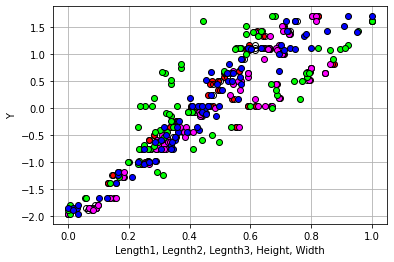

In [ ]:
#normalise x and y cause it supposedly helps the model perform better???

scaler = MinMaxScaler()
transformer = PowerTransformer()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)

y_train = transformer.fit_transform(y_train)
y_val = transformer.transform(y_val)

#plot again once normalised, it looks like a straight line now :)
plt.plot(X_train[:, 0],y_train,'ob',markeredgecolor='black', markerfacecolor=(1,0,0,1)) #Red | Length1
plt.plot(X_train[:, 1],y_train,'ob',markeredgecolor='black', markerfacecolor=(1,1,0,0)) #White | Length2
plt.plot(X_train[:, 2],y_train,'ob',markeredgecolor='black', markerfacecolor=(1,0,1,1)) #Pink | Length3
plt.plot(X_train[:, 3],y_train,'ob',markeredgecolor='black', markerfacecolor=(0,1,0,1)) #Green | height
plt.plot(X_train[:, 4],y_train,'ob',markeredgecolor='black', markerfacecolor=(0,0,1,1)) #Blue | Width

plt.xlabel('Length1, Legnth2, Legnth3, Height, Width')
plt.ylabel('Y')


plt.grid()

In [ ]:
# test LinearRegression(), weirdly this worked the best? did i make a mistake?

#reg_lin = linear_model.LinearRegression()
#reg_lin.fit(X_train, y_train)
#y_hat_train = reg_lin.predict(X_train)
#mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
#r2 = r2_score(y_hat_train, y_train)
#print('mse:',mse)
#print('r2:', r2)

#print(' ')

#y_hat_val = reg_lin.predict(X_val)
#mse = mean_squared_error(y_val, y_hat_val)
#mae = mean_absolute_error(y_val, y_hat_val)
#r2 = r2_score(y_val, y_hat_val)
#print('mse:',mse)
#print('mae:',mae)
#print('r2:', r2)
#print(' ')

In [ ]:
#plt.plot(y_val)
#plt.plot(y_hat_val)

In [ ]:
# test Ridge
def bestAlphaRidge(Max, Min):
  validation_error = []
  alpha_range = np.arange(Max, Min, -0.01)
  for a in alpha_range:
    regr = linear_model.Ridge(alpha=a, fit_intercept=True)
    regr.fit(X_train, y_train)

    # calculate the validation error MSE
    yhat_val = regr.predict(X_val)
    MSE_val = np.mean((yhat_val - y_val)**2)
    validation_error.append(MSE_val)
    bestalpha = alpha_range[np.argmin(validation_error)]
  return bestalpha

bestalpha = bestAlphaRidge(10,0)
print('ridge')
print('alpha:', bestalpha)
reg_ridge = linear_model.Ridge(alpha=bestalpha, fit_intercept=True)
reg_ridge.fit(X_train, y_train)
y_hat_trainr = reg_ridge.predict(X_train)
mse = mean_squared_error(y_train, y_hat_trainr)
r2 = r2_score(y_train, y_hat_trainr)
print('train mse:',mse)
print('train r2:', r2)
print(' ')

y_hat_valr = reg_ridge.predict(X_val)
mse = mean_squared_error(y_val, y_hat_valr)
r2 = r2_score(y_val, y_hat_valr)
mae = mean_absolute_error(y_val, y_hat_valr)
print('val mse:',mse)
print('val mae:',mae)
print('val r2:', r2)
print(' ')

ridge
alpha: 0.16000000000020975
train mse: 0.009969619302499781
train r2: 0.9900303806975003
 
val mse: 0.080172317017997
val mae: 0.13447605666630966
val r2: 0.9495840836389885
 


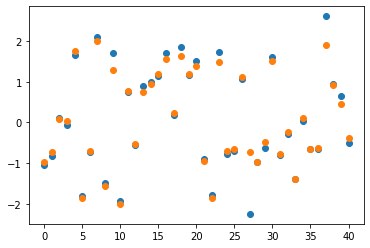

In [ ]:

plt.plot(y_val, 'o')

plt.plot(y_hat_valr, 'o')

In [ ]:
#test Lasso
def bestAlphaLasso(Max, Min):
  validation_error = []
  alpha_range = np.arange(Max, Min, -0.001)
  for a in alpha_range:
    regr = linear_model.Lasso(alpha=a, fit_intercept=True)
    regr.fit(X_train, y_train)

    # calculate the validation error MSE
    yhat_val = regr.predict(X_val)
    MSE_val = np.mean((yhat_val - y_val)**2)
    validation_error.append(MSE_val)
    bestalpha = alpha_range[np.argmin(validation_error)]
  return bestalpha

bestalphalasso = bestAlphaLasso(1,0)
print('lasso')
print('alpha:', bestalphalasso)
reg_lasso = linear_model.Lasso(alpha=bestalphalasso, fit_intercept=True)
reg_lasso.fit(X_train, y_train)
y_hat_trainl = reg_lasso.predict(X_train)
mse = mean_squared_error(y_train, y_hat_trainl)
r2 = r2_score(y_train, y_hat_trainl)
print('train mse:',mse)
print('train r2:', r2)
print(' ')

y_hat_vall = reg_lasso.predict(X_val)
mse = mean_squared_error(y_val, y_hat_vall)
r2 = r2_score(y_val, y_hat_vall)
mae = mean_absolute_error(y_val, y_hat_vall)
print('val mse:',mse)
print('val mae:',mae)
print('val r2:', r2)
print(' ')
print(y_hat_vall[1])

lasso
alpha: 0.2189999999999993
train mse: 0.9804919609046195
train r2: 0.019508039095380347
 
val mse: 1.57161043958492
val mae: 1.0896712096641887
val r2: 0.011701502197828506
 
-0.004945854040216602


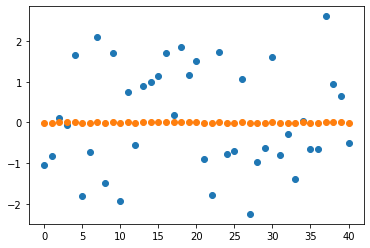

In [ ]:

plt.plot(y_val, 'o')
plt.plot(y_hat_vall, 'o') 
#i'm a bit confused on this, anyone know what i did wrong?


In [ ]:
#finding coefficients
w  = reg_ridge.coef_
w = np.insert(w, 0, reg_ridge.intercept_)
print(w)

[-2.10407365  0.73026667  0.71139288  0.5161813   0.94000851  1.71742823]


test mae: 31.33848191318338
test r2: 0.9677853846917062
 


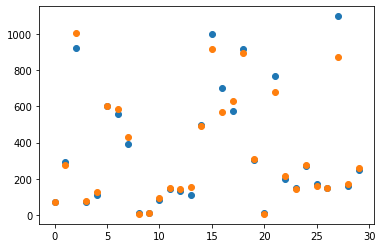

In [ ]:
''' 
The test set will be released on Sunday night
'''

X_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_label.csv').values

X_test = scaler.transform(X_test)

y_test = y_test.reshape(-1,1)
y_pred = reg_ridge.predict(X_test)
y_pred = transformer.inverse_transform(y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
#print('val mse:',mse)
print('test mae:',mae)
print('test r2:', r2)
print(' ')
plt.plot(y_test, 'o')
plt.plot(y_pred, 'o') 